In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## import the data

sence the data in json format we will use read_json from pandas.


In [66]:
Luxury_Beauty = pd.read_json('/content/drive/MyDrive/Luxury_Beauty/Luxury_Beauty_5.json', lines=True)

df.head()

,review,vote
0,this handcream has a beautiful fragrance it do...,1
1,wonderful hand lotion for seriously dry skin s...,1
2,best hand cream around silky thick soaks in a...,1
3,thanks five stars,1
4,great hand lotion soaks right in and leaves s...,1


## data description

*   reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
*   asin - ID of the product, e.g. B01GOZ61O8
*   reviewerName - name of the reviewer
*   vote - helpful votes of the review
*   style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
*   reviewText - text of the review
*   overall - rating of the product
*   summary - summary of the review
*   unixReviewTime - time of the review (unix time)
*   reviewTime - time of the review (raw)
*   image - images that users post after they have received the product



Hence our task is a sentement classification i will choose the upcoming columns

1.   overall
2.   reviewText
3.   summary



In [67]:
df = Luxury_Beauty[['reviewText', 'summary', 'overall']]

df.head()

,reviewText,summary,overall
0,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,5
1,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,5
2,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,5
3,Thanks!!,Five Stars,5
4,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,5


lets merge the reviewText and smmary column in one column called review
and drop these two column

In [68]:
df['review'] = df['reviewText']+ ' ' + df['summary']

df.drop(['reviewText', 'summary'], axis=1, inplace=True)


In [69]:
df.head()['review'][0]

'This handcream has a beautiful fragrance. It doesnt stay on or protect your hands through washing.  This size is quite small. Beautiful Fragrance'

## Data Cleaning
as we can see now we have the review column and its rating lets clean both of them

1.   for review column i will remove the punctuation only 
2.   and for overall column i will convert it into 2 classes
     *    positive class => (1)  for (4,5) ratings
     *    negative class => (0) for (1,2,3) ratings







In [70]:
import string

def remove_punctuation(x):
  translator = str.maketrans('', '', string.punctuation)
  return x.translate(translator).lower().replace('\n', '')

df['review'] = df['review'].apply(lambda x: remove_punctuation(str(x)))

df['review'][0]

'this handcream has a beautiful fragrance it doesnt stay on or protect your hands through washing  this size is quite small beautiful fragrance'

for the overall column i will do the following

1.   plot the distribution 
2.   convert it to the 3 classes
3.   plot the distribution again 



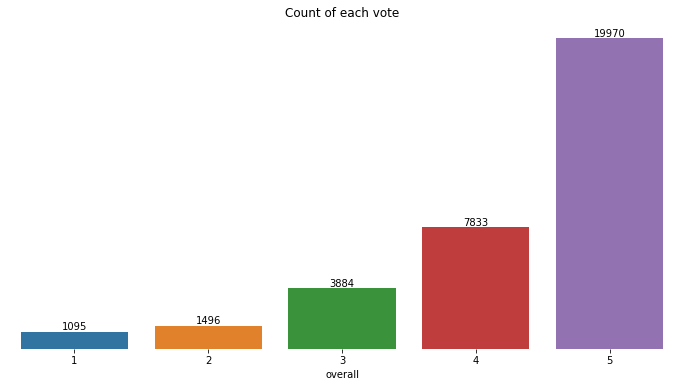

In [71]:
def count_plot(feature):
  plt.figure(figsize=(12, 6))
  ax = sns.countplot(data=df, x=feature)
  sns.despine(left=True, bottom=True)
  ax.bar_label(ax.containers[0])
  plt.yticks([], [])
  plt.ylabel('')
  plt.title('Count of each vote')
  plt.show();

count_plot('overall')

now lets create the new feature 'vote' that has two classes

*    positive class => (1)  for (4,5) ratings
*    negative class => (0) for (1,2,3) ratings



In [72]:
def vote_feature(x):
  return 1 if x == 4 or x == 5 else 0

df['vote'] = df['overall'].apply(vote_feature)
df.drop('overall', axis=1, inplace=True)

df.head()

,review,vote
0,this handcream has a beautiful fragrance it do...,1
1,wonderful hand lotion for seriously dry skin s...,1
2,best hand cream around silky thick soaks in a...,1
3,thanks five stars,1
4,great hand lotion soaks right in and leaves s...,1


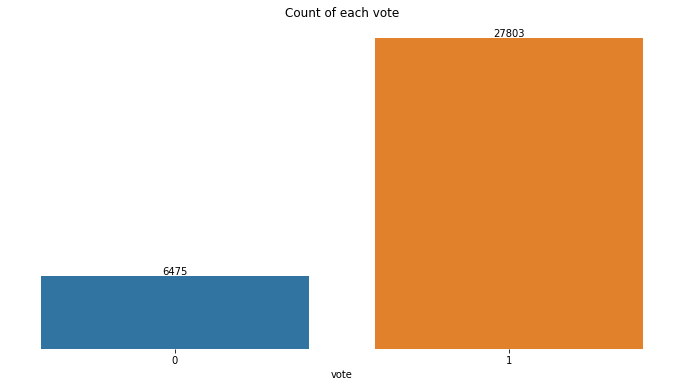

In [73]:
#plot the new vote

count_plot('vote')

In [74]:
#lets export the cleaned df to luxury_beauty_cLeaned.csv

df.to_csv('/content/drive/MyDrive/Luxury_Beauty/luxury_beauty_cLeaned.csv', index=False)

In [80]:
max_len = max(len(str(x).split()) for x in X)

max_len

2882

In [81]:
X = df['review']
[x for x in X if len(str(x).split()) >= 2882]

['the loreal dermablend professional line of cosmetics is new to me  they earn being in a highend category in my opinion they do not seem to be scented or too chemical the jars tubes compacts are made very sturdy to last along with your makeups i have many favorites among them yet i believe they all stand very well on their owni hope it is going to be efficient to review all of the ones i know of here and including compatible products along the way respectively1 loreal dermablend professional cover cregraveme with titanium dioxide sunscreen 30spf2 loreal dermablend professional translucent loose setting powder no spf3 loreal dermablend professional set  refresh longlasting makeup setting spray no spf4 loreal dermablend professional smooth liquid camo medium cover foundation 25 spf5 loreal dermablend professional intense powdercamo no spf6 loreal dermablend professional quickfix body no spf7 loreal dermablend professional leg and body makeup spf258 loreal dermablend quickfix concealer s